# Random Walks in Various Dimensions
### Noah Chavez 10/7/2023

#### 1D

First import some packages

In [125]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

Now we can write a 1D random walk easily. We can describe the current step of the walk using just one integer. Then, for each step there is an equal chance of moving in either direction. We using a Mersenne Twister to generate pseudo random numbers to "pick" the next step.

In [435]:
#a function to calculate average distance from the origin for a random walk of N steps
def walk_distance(number_of_steps: int, display_plot: bool) -> float:

    #intialize some values
    current_step = 0
    position = 0 #init position to the origin
    pos_history = np.array([0])

    #pick a random direction (left or right) and move that way
    while(current_step < number_of_steps):
        current_step += 1
        random_number = random.randint(0,1)
        if(random_number == 0):
            position += 1
        else:
            position -= 1
        pos_history = np.append(pos_history,position) #store the new current position


    if(display_plot):
        #now plot it
        print([step for step in np.arange(number_of_steps+1)])
        print([pos_history[step] for step in np.arange(number_of_steps+1)])
        plt.plot([step for step in np.arange(number_of_steps+1)], [pos_history[step] for step in np.arange(number_of_steps+1)],color="blue")
        plt.axhline(y=0,color="black")

    #print("Distance upon termination is: %s" % abs(position))
    return abs(position)


Now we can do some stats or just plot some runs out

In [436]:
def avg_distance(number_of_steps: int, number_of_trials:int) -> float:
    avg_dist = 0
    for run in np.arange(number_of_trials):
        avg_dist += walk_distance(number_of_steps,False)

    avg_dist = avg_dist / number_of_trials
    return avg_dist

    
number_of_steps = 1000 #1000
number_of_trials = 1000  #1000
#res = avg_distance(number_of_steps,number_of_trials)
#print("The average distance upon termination is: %s" % res)

logspacing = 50
#datax
steps = [int(step) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
#datay
walk_distance = [avg_distance(int(step),number_of_trials) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]

I guessed that the distance from the origin went as distance ~ sqrt(N). After searching around I have found that this is the correct relationship. Once thing that is concerning is my data is much lower than sqrt(N). Perhaps it is just a proportionality? I need to look into this more. After some more playing around it seems like it actually follows 0.8sqrt(N). **ANSWER:** This stack exchange (https://math.stackexchange.com/questions/103142/expected-value-of-random-walk) talks about how for a large value of N, the relation is actually $\sqrt{\frac{2N}{\pi}} \approx 0.8 \sqrt{N}$, and this *does* fit the data very well.

Text(0, 0.5, 'Distance from origin')

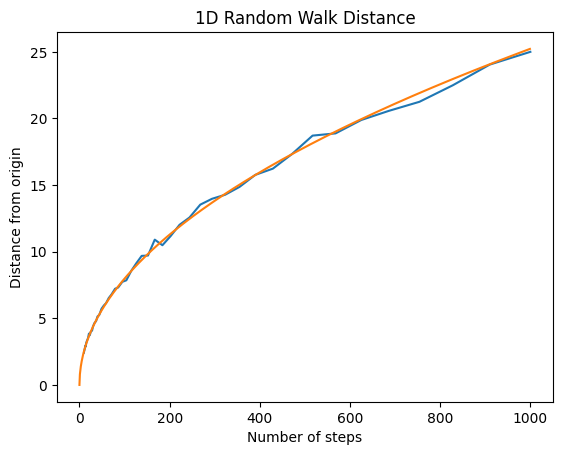

In [437]:
plt.plot(steps, walk_distance)
plt.plot([x for x in np.arange(1000)], [math.sqrt((2*x)/math.pi) for x in np.arange(1000)])
plt.title("1D Random Walk Distance")
plt.xlabel("Number of steps")
plt.ylabel("Distance from origin")

## Now on to 2D

The code should be roughly the same, but now our distance is not just the absolute value of the coordinates. Rather, it becomes the familiar $\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$. In general, for higher dimensions Euclidean distance is $\sqrt{\sum_{i=1}^n (q_i-q_i)^2}$ where $n$ is the number of dimensions. 

In [438]:
from matplotlib import cm
#a function to calculate average distance from the origin for a random walk of N steps
def twoD_walk_distance(number_of_steps: int, display_plot: bool) -> float:

    #intialize some values
    current_step = 0
    position = [0,0] #init position to the origin
    pos_history = [[0,0]]

    #pick a random direction and move that way
    while(current_step < number_of_steps):
        current_step += 1
        random_number = random.randint(0,4) #4DOF (0,1,2,3)

        if random_number == 0:
            position[0] += 1
        elif random_number == 1:
            position[1] += 1
        elif random_number == 2:
            position[0] -= 1
        elif random_number == 3:
            position[1] -= 1

        pos_history.append(position[:]) #store the new current position

        

    if(display_plot):
        #now plot it
        plt.axhline(y=0,color="black")
        plt.axvline(x=0,color="black")
        plt.plot([step_pos[0] for step_pos in pos_history], [step_pos[1] for step_pos in pos_history], color="red")

    #print(pos_history)
    #print("Distance upon termination is: %s" % abs(position))
    distance = math.sqrt(math.pow(position[0],2) + math.pow(position[1],2))
    return distance


In [439]:
def two_avg_distance(number_of_steps: int, number_of_trials:int) -> float:
    avg_dist = 0
    for run in np.arange(number_of_trials):
        avg_dist += twoD_walk_distance(number_of_steps,False)

    avg_dist = avg_dist / number_of_trials
    return avg_dist

    
number_of_steps = 1000 #1000
number_of_trials = 1000  #1000
#res = avg_distance(number_of_steps,number_of_trials)
#print("The average distance upon termination is: %s" % res)

logspacing = 50
#datax
steps = [int(step) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
#datay
walk_distance_2D = [two_avg_distance(int(step),number_of_trials) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]

Text(0, 0.5, 'Distance from origin')

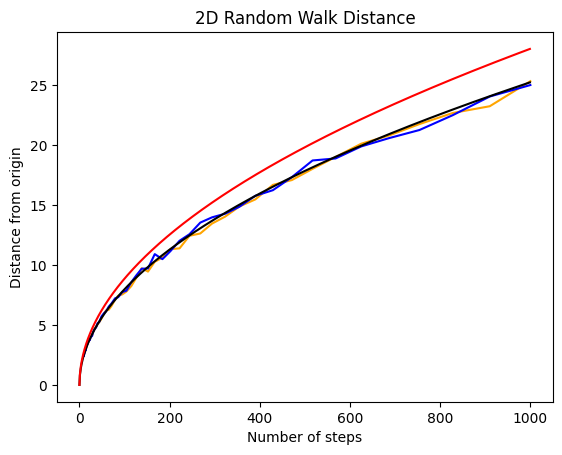

In [448]:
plt.plot(steps, walk_distance_2D, color="orange")
plt.plot(steps, walk_distance, color="blue")
plt.plot([x for x in np.arange(1000)], [math.sqrt((2*x)/math.pi) for x in np.arange(1000)], color="black")
plt.plot([x for x in np.arange(1000)], [math.sqrt(math.pi*x) / 2 for x in np.arange(1000)], color="red")
plt.title("2D Random Walk Distance")
plt.xlabel("Number of steps")
plt.ylabel("Distance from origin")